In [1]:
import os
import sys

os.environ["SPARK_HOME"] = "/opt/spark-3.4.0"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.7"
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3.7"

sys.path.insert(0, "/usr/bin/python3.7")
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.9.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Customer segmentation is a marketing technique companies use  to identify and group users who display similar characteristics. For instance, if you visit Starbucks only during the summer to purchase cold beverages, you can be segmented as a “seasonal shopper” and enticed with special promotions curated for  the summer season.

Data scientists usually build unsupervised machine learning algorithms such as K-Means clustering or hierarchical clustering to perform customer segmentation. These models are great at identifying similar patterns between user groups that often go unnoticed by the human eye.

we will use K-Means clustering to perform customer segmentation on the e-commerce dataset 

In [3]:
# Creating Spark Session

spark = SparkSession.builder.appName('Project_2_play_with_pyspark').config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

23/09/09 17:03:01 WARN Utils: Your hostname, user-Latitude-3420 resolves to a loopback address: 127.0.1.1; using 192.168.1.15 instead (on interface wlp44s0)
23/09/09 17:03:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/09 17:03:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Using the codes above, we built a spark session and set a name for the application. Then, the data was cached in off-heap memory to avoid storing it directly on disk, and the amount of memory was manually specified to 10GB.

In [4]:
cwd = os.getcwd()
cwd

'/home/user/Desktop/Projects/Project_2'

In [5]:
# Creating the Dataframe

df = spark.read.csv("Online Retail.csv", header=True)

In [6]:
df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/10 08:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/10 08:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



In [7]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



The dataframe consists of 8 variables:

    - InvoiceNo: The 6-digit integral number unique identifier of each customer invoice. Nominal. If this code starts with letter 'c', it indicates a cancellation. 
    - StockCode: The 5-digit integral number unique identifier of each item in stock. Nominal.
    - Description: The item purchased by the customer. Nominal.
    - Quantity: The number of each item purchased by a customer in a single invoice. Numeric.
    - InvoiceDate: The purchase date. Numeric.
    - UnitPrice: Price of one unit of each item. Numeric, Product price per unit in sterling.
    - CustomerID: 5-digit Unique identifier assigned to each Customer.
    - Country: The country from where the purchase was made. Nominal.


## EDA - Exploratory Data Analysis

In [8]:
# Shape of df
df.count()

# 541909 rows and 8 columns : (541909, 8)

541909

In [9]:
# number of unique customers
df.select("CustomerID").distinct().count()

# There are 4373 customers who made purchase

4373

In [10]:
# Dropping Entire rows containing Null 
df=df.na.drop()
df.count()

#  new shape (406829, 8)

406829

In [11]:
# value_count() for Country
df.groupBy('Country').count().orderBy(desc('count')).show(200)

+--------------------+------+
|             Country| count|
+--------------------+------+
|      United Kingdom|361878|
|             Germany|  9495|
|              France|  8491|
|                EIRE|  7485|
|               Spain|  2533|
|         Netherlands|  2371|
|             Belgium|  2069|
|         Switzerland|  1877|
|            Portugal|  1480|
|           Australia|  1259|
|              Norway|  1086|
|               Italy|   803|
|     Channel Islands|   758|
|             Finland|   695|
|              Cyprus|   622|
|              Sweden|   462|
|             Austria|   401|
|             Denmark|   389|
|               Japan|   358|
|              Poland|   341|
|                 USA|   291|
|              Israel|   250|
|         Unspecified|   244|
|           Singapore|   229|
|             Iceland|   182|
|              Canada|   151|
|              Greece|   146|
|               Malta|   127|
|United Arab Emirates|    68|
|  European Community|    61|
|         

In [12]:
# countrywise purchases
df.groupBy("Country").agg(countDistinct("CustomerID").alias("country_count")).orderBy(desc("country_count")).show(40)

+--------------------+-------------+
|             Country|country_count|
+--------------------+-------------+
|      United Kingdom|         3950|
|             Germany|           95|
|              France|           87|
|               Spain|           31|
|             Belgium|           25|
|         Switzerland|           21|
|            Portugal|           19|
|               Italy|           15|
|             Finland|           12|
|             Austria|           11|
|              Norway|           10|
|             Denmark|            9|
|     Channel Islands|            9|
|           Australia|            9|
|         Netherlands|            9|
|              Sweden|            8|
|              Cyprus|            8|
|               Japan|            8|
|              Poland|            6|
|              Greece|            4|
|         Unspecified|            4|
|              Israel|            4|
|                 USA|            4|
|              Canada|            4|
|

Almost all the purchases on the platform were made from the United Kingdom, and only a handful were made from countries like Germany, Spain, and France. 

To sort the table in the order of purchases, we included the orderBy() clause

In [13]:
# latest purchase was made on the platform
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date', to_timestamp("InvoiceDate", "dd/MM/yy HH:mm"))
df.select(max("date")).alias("LatestPurchase").show()

# 2011-12-09 12:50:00

+-------------------+
|          max(date)|
+-------------------+
|2011-12-09 12:50:00|
+-------------------+



In [14]:
df.select(min("date")).alias("OldestPurchase").show()

# 2010-12-01 08:26:00

+-------------------+
|          min(date)|
+-------------------+
|2010-12-01 08:26:00|
+-------------------+



Our min and max dates are within limits

## Data Preprocessing

- From the dataset above, we need to create multiple customer segments based on each user’s purchase behavior. 

The variables in this dataset are in a format that cannot be easily ingested into the customer segmentation model. These features individually do not tell us much about customer purchase behavior.

Due to this, we will use the existing variables to derive three new informative features - recency, frequency, and monetary value (RFM).

RFM is commonly used in marketing to evaluate a client’s value based on their:

    Recency: How recently has each customer made a purchase?
    Frequency: How often have they bought something?
    Monetary Value: How much money do they spend on average when making purchases?

We will now preprocess the dataframe to create the above variables.


### Recency

- calculate the value of recency - the latest date and time a purchase was made on the platform.
- **step 1**: Assign a recency score to each customer
- We will subtract every date in the dataframe from the earliest date. This will tell us how recently a customer was seen in the dataframe. A value of 0 indicates the lowest recency, as it will be assigned to the person who was seen making a purchase on the earliest date.
- **step 2**: Select the most recent purchase
- One customer can make multiple purchases at different times. We need to select only the last time they were seen buying a product, as this is indicative of when the most recent purchase was made.

In [15]:
df = df.withColumn("from_date", lit("1/12/10 08:26"))
df = df.withColumn("from_date", to_timestamp("from_date", 'dd/MM/yy HH:mm'))

print(df.show())

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/10 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/10 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|

In [16]:
df2 = df.withColumn("from_date", to_timestamp(col('from_date'))).withColumn('recency', col("date").cast('long') - col('from_date').cast('long'))

print(df2.show())

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|recency|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/10 08:26|     2.55|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/10 08:26|     3.39|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/10 08:26|     2.75|     17850|United Kingdom|2010-12-01 08:26:00|2010-12-01 08:26:00|      0|
|   536365|   84029G|KNITTED UNION FLA...|       6|01/12/10 08:26|     3.39|     17850|United 

In [19]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')), on='recency',how='leftsemi')
df2.show()

+-------+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|               date|          from_date|
+-------+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------------------+-------------------+
|   5220|   536384|    82484|WOOD BLACK BOARD ...|       3|01/12/10 09:53|     6.45|     18074|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|
|   5220|   536384|    84755|COLOUR GLASS T-LI...|      48|01/12/10 09:53|     0.65|     18074|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|
|   5220|   536384|    22464|HANGING METAL HEA...|      12|01/12/10 09:53|     1.65|     18074|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|
|   5220|   536384|    21324|HANGING MEDINA LA...|       6|01/12/10 09:53|     2.95|     18074

In [20]:
df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)



### Frequency: 

- calculate the value of frequency - how often a customer bought something on the platform
- group by each customer ID and count the number of items they purchased
- 

In [21]:
freq_df = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('freq'))
freq_df.show(20)

+----------+----+
|CustomerID|freq|
+----------+----+
|     17714|  10|
|     17551|  43|
|     13187|  37|
|     15052|  30|
|     17128|  14|
|     14439|  32|
|     18106|  39|
|     17855|  17|
|     12386|   2|
|     13065|  14|
|     16510|  13|
|     17303|  53|
|     15100|   1|
|     13328|  17|
|     15899|   4|
|     16519|  13|
|     15350|   5|
|     18113|   1|
|     13144|   3|
|     15180|   6|
+----------+----+
only showing top 20 rows



In [22]:
df3 = df2.join(freq_df, on='CustomerID', how='inner')
df3.show(20)

+----------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+
|CustomerID|recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|freq|
+----------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+
|     18074|   5220|   536384|    82484|WOOD BLACK BOARD ...|       3|01/12/10 09:53|     6.45|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|
|     18074|   5220|   536384|    84755|COLOUR GLASS T-LI...|      48|01/12/10 09:53|     0.65|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|
|     18074|   5220|   536384|    22464|HANGING METAL HEA...|      12|01/12/10 09:53|     1.65|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|
|     18074|   5220|   536384|    21324|HANGING MEDINA LA...|   

In [23]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- freq: long (nullable = false)



### Monetary Value

- calculate monetary value - the total amount spent by each customer in the dataframe
- **step 1**: Find the total amount spent in each purchase
- Each customerID comes with variables called “Quantity” and “UnitPrice” for a single purchase
- **step 2**: Find the total amount spent by each customer
- group by the CustomerID column and sum the total amount spent

In [24]:
m_val = df3.withColumn("TotalAmount", col("Quantity") * col("UnitPrice"))
m_val.show(5)

+----------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+------------------+
|CustomerID|recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|freq|       TotalAmount|
+----------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+------------------+
|     18074|   5220|   536384|    82484|WOOD BLACK BOARD ...|       3|01/12/10 09:53|     6.45|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|             19.35|
|     18074|   5220|   536384|    84755|COLOUR GLASS T-LI...|      48|01/12/10 09:53|     0.65|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|31.200000000000003|
|     18074|   5220|   536384|    22464|HANGING METAL HEA...|      12|01/12/10 09:53|     1.65|United Kingdom|2010-12-01 09:5

In [25]:
m_val = m_val.groupBy('CustomerID').agg(sum("TotalAmount").alias("monetary_value"))
m_val.show(5)

+----------+------------------+
|CustomerID|    monetary_value|
+----------+------------------+
|     17714|             153.0|
|     17551|            306.84|
|     13187|236.01999999999995|
|     15052|            215.78|
|     17128|            157.09|
+----------+------------------+
only showing top 5 rows



In [26]:
finaldf = m_val.join(df3, on='CustomerID', how='inner')
finaldf.show(5)

+----------+--------------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+
|CustomerID|monetary_value|recency|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|       Country|               date|          from_date|freq|
+----------+--------------+-------+---------+---------+--------------------+--------+--------------+---------+--------------+-------------------+-------------------+----+
|     18074|         489.6|   5220|   536384|    82484|WOOD BLACK BOARD ...|       3|01/12/10 09:53|     6.45|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|
|     18074|         489.6|   5220|   536384|    84755|COLOUR GLASS T-LI...|      48|01/12/10 09:53|     0.65|United Kingdom|2010-12-01 09:53:00|2010-12-01 08:26:00|  13|
|     18074|         489.6|   5220|   536384|    22464|HANGING METAL HEA...|      12|01/12/10 09:53|     1.65|United Kingdom|2010-12-01 09:53:00|

In [28]:
finaldf = finaldf.select(['CustomerID', 'recency', 'freq', 'monetary_value']).distinct()
finaldf.show(10)

+----------+-------+----+------------------+
|CustomerID|recency|freq|    monetary_value|
+----------+-------+----+------------------+
|     17714|4586760|  10|             153.0|
|     17551|1230360|  43|            306.84|
|     13187|3148260|  37|236.01999999999995|
|     15052|4692360|  30|            215.78|
|     17128|3382560|  14|            157.09|
|     14439|4677180|  32|           2661.24|
|     18106|3815820|  39| 430.6999999999999|
|     17855|  91080|  17|208.96999999999997|
|     12386|3125460|   2|             143.0|
|     13065|  30360|  14|205.85999999999999|
+----------+-------+----+------------------+
only showing top 10 rows



In [29]:
finaldf.count()

4839

### Standardization

Before building the customer segmentation model, need to standardize the dataframe to ensure that all the variables are around the same scale

In [30]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble = VectorAssembler(inputCols= ['recency', 'freq', 'monetary_value'], outputCol='features')
assembled_data = assemble.transform(finaldf)

scale = StandardScaler(inputCol='features', outputCol='std_feats')
data_scaled = scale.fit(assembled_data)
data_scaled_output = data_scaled.transform(assembled_data)


This code uses PySpark's machine learning library to perform feature engineering on a dataset.
-  First, it imports the necessary modules for feature engineering: VectorAssembler and StandardScaler.
-  Next, it creates a VectorAssembler object called assemble that takes in three input columns (recency, frequency, and monetary_value) and outputs a single column called features.
-  This combines the three input columns into a single vector that can be used as input for machine learning algorithms.
-  Then, it applies the assemble transformation to the finaldf dataset using the transform method, and stores the result in assembled_data.
-  After that, it creates a StandardScaler object called scale that takes in the features column from assembled_data and outputs a new column called standardized.
-  This scales the features column so that each feature has a mean of 0 and a standard deviation of 1.
-  This is important for some machine learning algorithms that require standardized input.
-  Finally, it applies the scale transformation to assembled_data using the fit and transform methods, and stores the result in data_scale_output.
-  This gives us a new dataset where the features column has been standardized.

In [31]:
data_scaled_output.show(5, truncate=False)

+----------+-------+----+------------------+-----------------------------------+------------------------------------------------------------+
|CustomerID|recency|freq|monetary_value    |features                           |std_feats                                                   |
+----------+-------+----+------------------+-----------------------------------+------------------------------------------------------------+
|17714     |4586760|10  |153.0             |[4586760.0,10.0,153.0]             |[0.5258889381294375,0.2581972844370304,0.054732953197303036]|
|17551     |1230360|43  |306.84            |[1230360.0,43.0,306.84]            |[0.1410653083913121,1.1102483230792306,0.10976640103961086] |
|13187     |3148260|37  |236.01999999999995|[3148260.0,37.0,236.01999999999995]|[0.3609596116551515,0.9553299524170125,0.08443184061194418] |
|15052     |4692360|30  |215.78            |[4692360.0,30.0,215.78]            |[0.5379963673096144,0.7745918533110911,0.07719135059420947] |
|17128

In [32]:
data_scaled_output.select('std_feats').show(25, truncate=False)

+---------------------------------------------------------------+
|std_feats                                                      |
+---------------------------------------------------------------+
|[0.5258889381294375,0.2581972844370304,0.054732953197303036]   |
|[0.1410653083913121,1.1102483230792306,0.10976640103961086]    |
|[0.3609596116551515,0.9553299524170125,0.08443184061194418]    |
|[0.5379963673096144,0.7745918533110911,0.07719135059420947]    |
|[0.3878229701486692,0.36147619821184257,0.05619607593310022]   |
|[0.5362559243649639,0.8262313101984973,0.9520099631816387]     |
|[0.43749782589302033,1.0069694093044186,0.15407505190900922]   |
|[0.010442657667902651,0.4389353835429517,0.0747551975793491]   |
|[0.3583455076276133,0.05163945688740608,0.05115563599486493]   |
|[0.0034808858893008838,0.36147619821184257,0.07364265192939086]|
|[0.012059274632301283,0.3356564697681395,0.08875323979248943]  |
|[0.12097798270601846,1.3684456075162612,0.0894472393297624]    |
|[0.429559

In [33]:
data_scaled_output.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- freq: long (nullable = false)
 |-- monetary_value: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- std_feats: vector (nullable = true)



## Model Building
### Finding number of clusters to build

- When building a K-Means clustering model, we first need to determine the number of clusters or groups we want the algorithm to return using `Elbow Method`

In [37]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='std_feats', metricName='silhoutte', distanceMeasure='squaredEuclidean')

for i in range(2, 10):
    KMeans_algo = KMeans(featuresCol='std_feats', k=i)
    print(f"Attempting KMeans with k={i}")
    try:
        KMeans_fit = KMeans_algo.fit(data_scaled_output)
        output = KMeans_fit.transform(data_scaled_output)
        cost[i] = KMeans_fit.summary.trainingCost
    except Exception as e:
        print(f"Error occurred: {str(e)}")

Attempting KMeans with k=2


Attempting KMeans with k=3


Attempting KMeans with k=4


Attempting KMeans with k=5


Attempting KMeans with k=6


Attempting KMeans with k=7


Attempting KMeans with k=8


Attempting KMeans with k=9


This code imports the necessary libraries for performing KMeans clustering using PySpark.
-  It then initializes an array of zeros with length 10 to store the cost of each KMeans model.
-  Next, it creates an instance of the ClusteringEvaluator class, which will be used to evaluate the quality of the clustering results.
-  The evaluator is configured to use the silhouette metric with squared Euclidean distance.
-  The code then enters a loop that iterates over values of k from 2 to 9.
-  For each value of k, a KMeans algorithm is created with the specified number of clusters and the standardized features column.
-  The algorithm is then fit to the data and used to transform the data to obtain the cluster assignments.
-  Finally, the training cost of the KMeans model is stored in the cost array at the index corresponding to the current value of k.
-  The training cost is a measure of how well the model fits the data, and is calculated as the sum of squared distances between each point and its assigned cluster center.

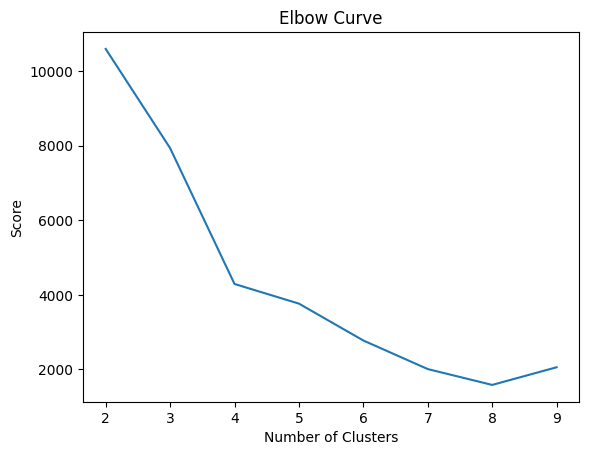

In [38]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [39]:
KMeans_algo=KMeans(featuresCol='std_feats', k=4)
KMeans_fit=KMeans_algo.fit(data_scaled_output)

In [40]:
preds=KMeans_fit.transform(data_scaled_output)

preds.show(5,0)

+----------+-------+----+------------------+-----------------------------------+------------------------------------------------------------+----------+
|CustomerID|recency|freq|monetary_value    |features                           |std_feats                                                   |prediction|
+----------+-------+----+------------------+-----------------------------------+------------------------------------------------------------+----------+
|17714     |4586760|10  |153.0             |[4586760.0,10.0,153.0]             |[0.5258889381294375,0.2581972844370304,0.054732953197303036]|0         |
|17551     |1230360|43  |306.84            |[1230360.0,43.0,306.84]            |[0.1410653083913121,1.1102483230792306,0.10976640103961086] |0         |
|13187     |3148260|37  |236.01999999999995|[3148260.0,37.0,236.01999999999995]|[0.3609596116551515,0.9553299524170125,0.08443184061194418] |0         |
|15052     |4692360|30  |215.78            |[4692360.0,30.0,215.78]            |[0

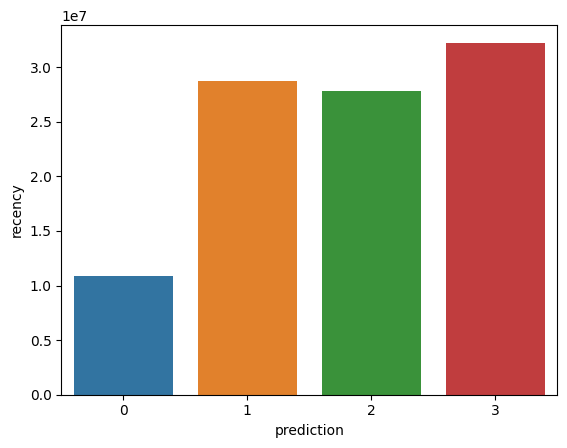

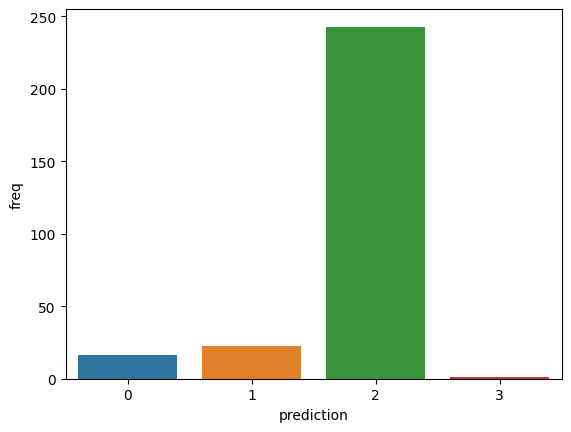

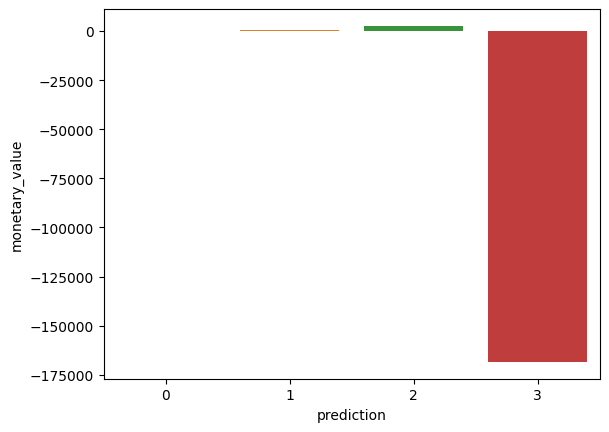

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('recency','freq','monetary_value','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency','freq','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

Here is an overview of characteristics displayed by customers in each cluster:

- Cluster 0: Customers in this segment display lowest recency, frequency, and monetary value. They rarely shop on the platform and are low potential customers who are likely to stop doing business with the ecommerce company.

- Cluster 1: Users in this cluster display high recency but haven’t been seen spending much on the platform. They also don’t visit the site often. This indicates that they might be newer customers who have just started doing business with the company.

- Cluster 2: Customers in this segment display high recency and frequency and spend a medium money on the platform. This indicates that they tend to buy high-value items or make bulk purchases.

- Cluster 3: The final segment comprises users who display high recency and make frequent purchases on the platform. However, they don’t spend much on the platform, which might mean that they tend to select cheaper items in each purchase.


In [ ]:
spark.stop()